## Programming Exercise 8

### Setup
This loads the required modules. No other modules are necessary to successfully finish this exercise.

In [53]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float, filters
import seaborn as sns

### 8.1 Harris Corner Detector

#### 8.1.1 

Load the grayscale image `building.jpg` from the `resources` folder, convert it to floating point format and transform the color space to grayscale. Display the image.

(200, 200)
(202, 202)


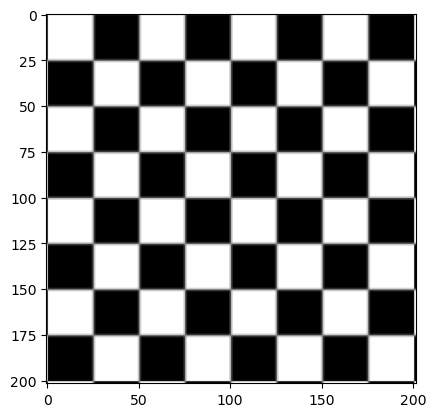

In [87]:
image=img_as_float(io.imread('./resources/checkerboard.png'))
print(image.shape)
image=np.pad(image, 1, mode='wrap')
print(image.shape)
plt.imshow(image, cmap='gray');

#### 8.1.2

Write a function `compute_derivatives(image)` that estimates the derivatives of the image in x- and y-direcition using the Sobel filter. Display the results for the given image.

(202, 202)


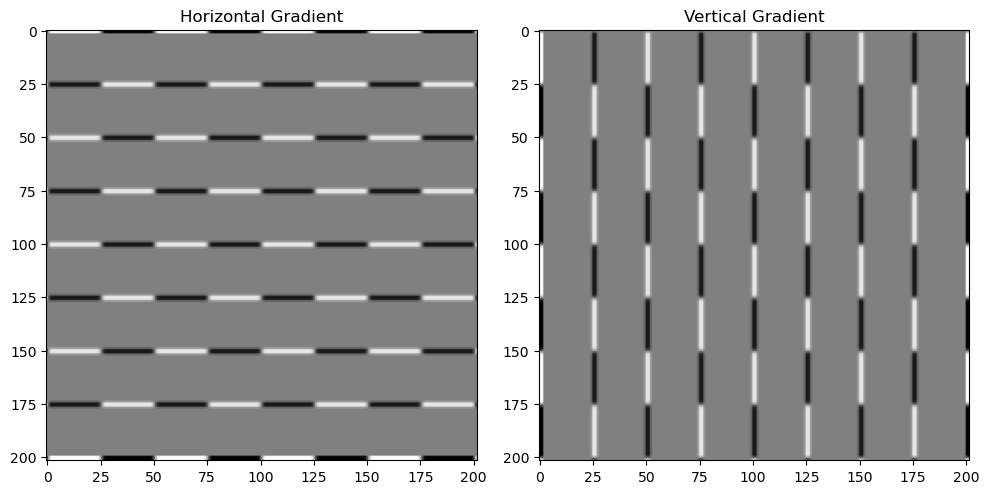

In [88]:
def compute_derivatives(image):
    gx = filters.sobel_h(image)
    gy = filters.sobel_v(image)
    return gx, gy

gx,gy=compute_derivatives(image)
print(gx.shape)
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(10,5))
ax0.imshow(gx, cmap='gray');
ax0.set_title('Horizontal Gradient')
ax1.imshow(gy, cmap='gray');
ax1.set_title('Vertical Gradient')
plt.tight_layout()
plt.show()  


#### 8.1.3

Write a function `compute_harris_matrices(gx, gy)` that takes the derivatives in x- and y-direction (`gx`, `gy`) and calculate the Harris matrices at every position in the image using a Gaussian filter kernel. Use the function to calculate the harris_matrices for the derivatives from Subtask 8.1.2.

(2, 2, 204, 204)


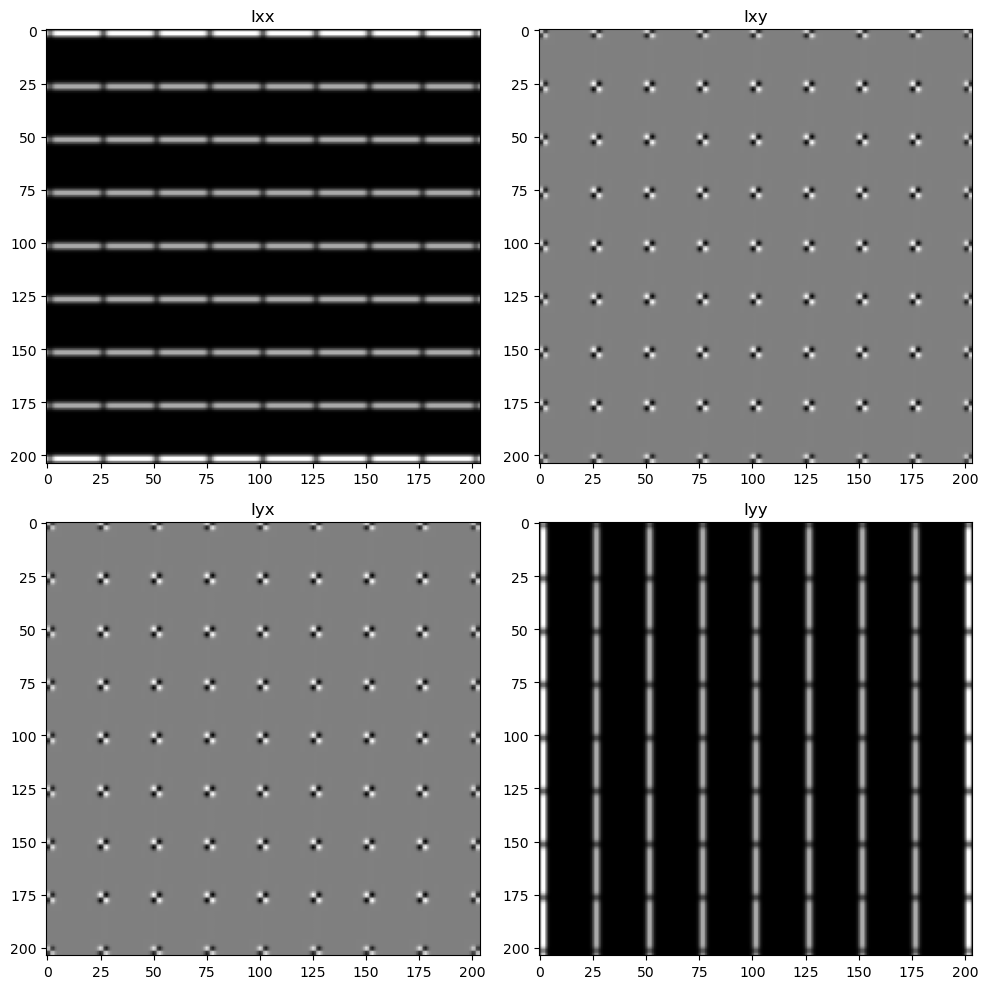

In [83]:
def compute_harris_matrices(gx,gy,sigma=1):
    Ixx=filters.gaussian(gx**2,sigma)
    Iyy=filters.gaussian(gy**2,sigma)
    Ixy=filters.gaussian(gx*gy,sigma)
    return np.array([[Ixx,Ixy],[Ixy,Iyy]])

harris_matrices=compute_harris_matrices(gx,gy)
print(harris_matrices.shape)
fig,ax=plt.subplots(2,2,figsize=(10,10))    
ax[0,0].imshow(harris_matrices[0,0], cmap='gray')
ax[0,0].set_title('Ixx')
ax[0,1].imshow(harris_matrices[0,1], cmap='gray')
ax[0,1].set_title('Ixy')
ax[1,0].imshow(harris_matrices[1,0], cmap='gray')
ax[1,0].set_title('Iyx')
ax[1,1].imshow(harris_matrices[1,1], cmap='gray')
ax[1,1].set_title('Iyy')
plt.tight_layout()
plt.show()

#### 8.1.4

Write a function `compute_cornerness(harris_matrices, kappa)` that takes the Harris matrices and calculates the cornerness at every position in the image as

$$ C(x, y) = \text{det}(\mathbf{M}) - \kappa (\text{Tr}(\mathbf{M}))^2. $$

Calculate and display the cornerness for the Harris matrices from Subtask 8.1.3 with $\kappa = 0.1$

0.06642992300960693


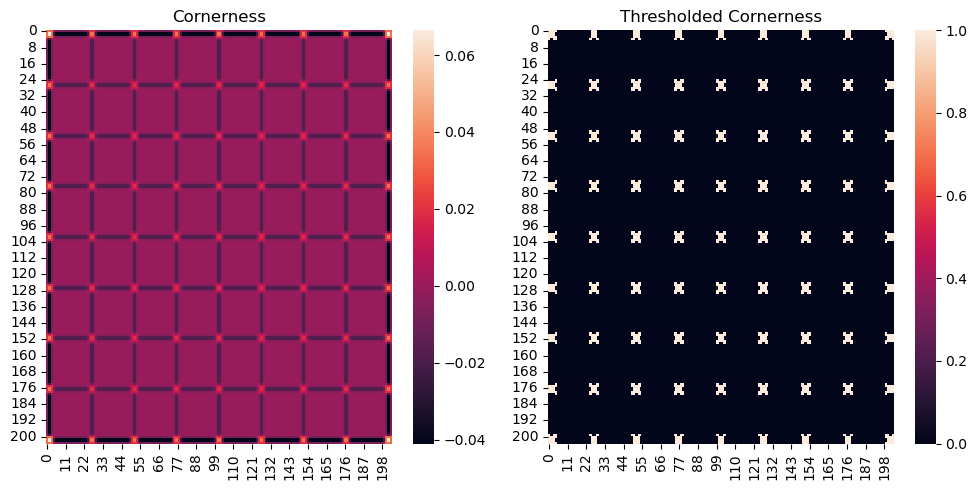

In [84]:
def compute_cornerness(harris_matrices,kappa):
    det=harris_matrices[0,0]*harris_matrices[1,1]-harris_matrices[0,1]*harris_matrices[1,0]
    trace=harris_matrices[0,0]+harris_matrices[1,1]
    cornerness=det-kappa*trace**2
    return cornerness

cornerness=compute_cornerness(harris_matrices,0.1)
print(cornerness.max())
thresholded_corners=cornerness>(0.01*cornerness.max())
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1=sns.heatmap(cornerness,ax=ax1)
ax1.set_title('Cornerness')
ax2=sns.heatmap(thresholded_corners,ax=ax2)
ax2.set_title('Thresholded Cornerness')
plt.tight_layout()  
plt.show()

#### 8.1.5

Write a function `detect_corners(cornerness, threshold)` that takes the cornerness metric and performs a thresholding and non-maximum suppression in order to detect the corner positions $(x_i, y_i)$. For non-maximum suppression, check the cornerness of the 8 neighboring pixels and only append the current pixel to the list of corner positions if none of its neighbors are larger. The function shall return a list of corner positions.

Detect the corners for the cornerness from Subtask 8.1.4 using a suitable threshold and display the final corners as an overlay over the original image.

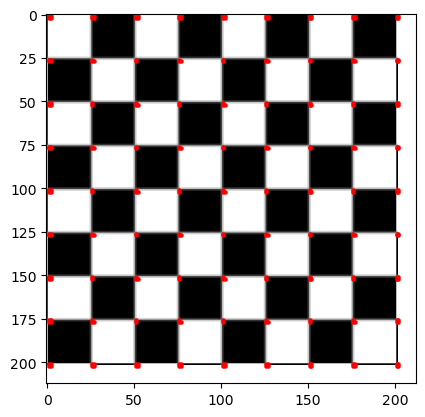

In [ ]:
def detect_corners(cornerness,threshold):
    corners=(cornerness>threshold)*cornerness 
    rows,cols=corners.shape[:2]
    corner_positions=[]
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            neighborhood=corners[i-1:i+2,j-1:j+2]
            if corners[i,j]==neighborhood.max() and corners[i,j]>0:
                corner_positions.append([i,j])
    return np.array(corner_positions)

corners=detect_corners(cornerness,0.01*cornerness.max())
plt.imshow(image, cmap='gray')  
plt.scatter(corners[:,1],corners[:,0],s=5,c='r')
plt.show()